In [2]:
import pandas as pd
import matplotlib.pyplot as plt
advertising = pd.read_csv('/content/tvmarketing.csv')

# columnt TV = advertising budget spent on TV Marketing
# Sales = how much have been sold (revenue)

In [3]:
advertising.head(5)

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [4]:
advertising.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [6]:
import seaborn as sns


<Axes: xlabel='TV', ylabel='Sales'>

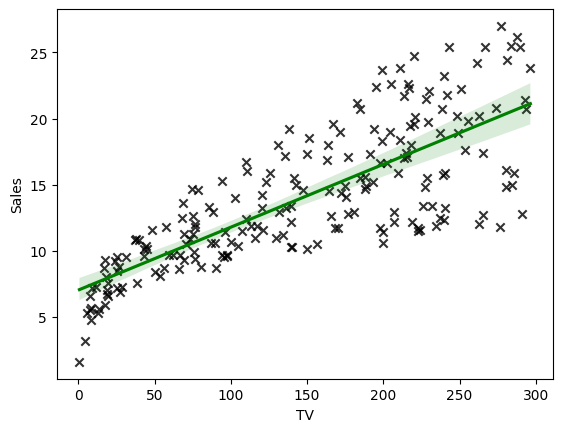

In [13]:
# REGRESSION PLOT
sns.regplot(x='TV',y='Sales',data=advertising,ci=99,marker="x",color="black",line_kws=dict(color="green"))

In [14]:
# PEARS ON CORRELATION KOEFFICIENT
advertising.corr() #calculate correlation for whole dataframe

,TV,Sales
TV,1.000000,0.782224
Sales,0.782224,1.000000


In [15]:
advertising['TV'].corr(advertising['Sales']) #column vs column
# positive, strong correlation (0.78)
'''
Weak Correlation: 0 to ±0.3

Moderate Correlation: ±0.3 to ±0.7

Strong Correlation: ±0.7 to ±1
'''


0.7822244248616061

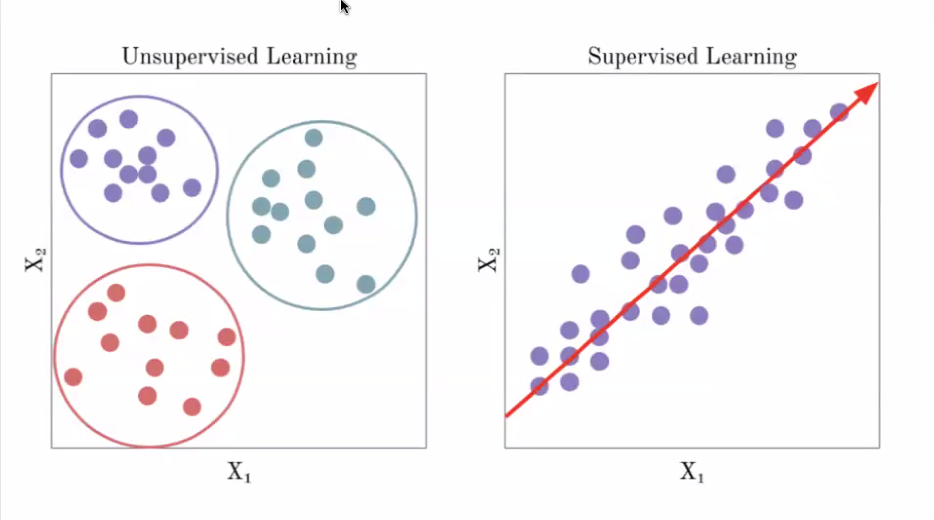

In [ ]:
# SUPERVISED VS UNSUPERVISED
'''
SUPERVISED - labeled data
UNSUPERVISED - data without label

'''

In [ ]:
# TRAINING LINEAR REGRESSION MODEL
'''
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
'''

In [16]:
# Preparing X and Y

X = advertising.drop('Sales', axis=1) # independant variable (TV)
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [17]:
Y = advertising.drop('TV', axis=1) # the outcome, dependent (Sales)
Y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [ ]:
# Split data in TRAIN/TEST sets

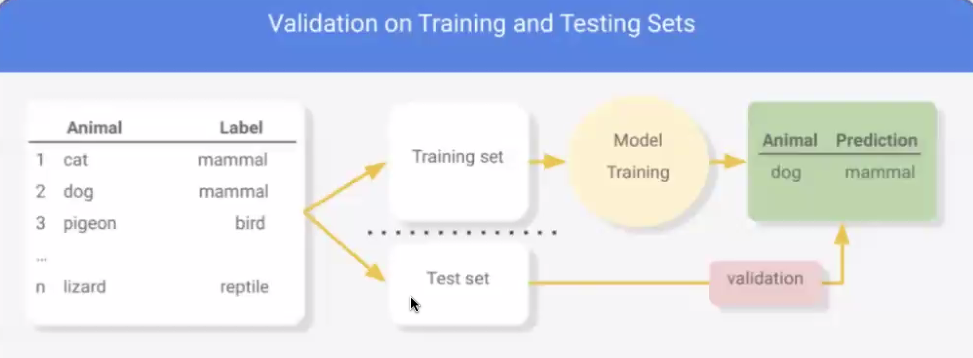

In [18]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, random_state=42) #70% goes to training, 30% to testing
# random_state - data stays every time the same, 42 - good practice

In [21]:
X_train

,TV
165,234.5
119,19.4
180,156.6
80,76.4
123,123.1
...,...
31,112.9
89,109.8
47,239.9
152,197.6


In [ ]:
# LINEAR REGRESSION
# COLUMN - FEATURE
# ROW - OBSERVATION

In [24]:
# Train the model

from sklearn.linear_model import LinearRegression # import the model

In [25]:
model = LinearRegression() # initialize the model

In [26]:
model.fit(X_train, y_train) # fit the model on our data

LinearRegression()

In [27]:
# Linear regression formula:  Y = mX + b

print(f'Model intercept is: {model.intercept_}') #if no advertisement, sale is still 7.23 (value where data start from x or y axis)
print(f'Model coefficient is: {model.coef_}') #

Model intercept is: [7.23945983]
Model coefficient is: [[0.0464078]]


In [ ]:
# PREDICTION

In [36]:
my_new_budget = [[100]] #2D array dataset, have to be same format as in train
my_predicted_sales = model.predict(my_new_budget)

my_predicted_sales
print(f'When the budget of "TV" is {my_new_budget[0][0]}, then predicted sales are {my_predicted_sales[0][0].round(2)}') #[0][0] - remove [] from printout

When the budget of "TV" is 100, then predicted sales are 11.88


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [38]:
# Comparing Train set to Test.

X_test.head()

,TV
95,163.3
15,195.4
30,292.9
158,11.7
128,220.3


In [39]:
y_pred = model.predict(X_test)

In [42]:
final_df = pd.DataFrame()
final_df['TV'] = X_test
final_df['Actual_sales'] = y_test
final_df['Predicted_sales'] = y_pred
final_df.head()

,TV,Actual_sales,Predicted_sales
95,163.3,16.9,14.817854
15,195.4,22.4,16.307544
30,292.9,21.4,20.832305
158,11.7,7.3,7.782431
128,220.3,24.7,17.463099


In [43]:
final_df['ABS_Error_Actual_vs_Predicted'] = abs(final_df['Actual_sales'] - final_df['Predicted_sales'])
final_df.head()

,TV,Actual_sales,Predicted_sales,ABS_Error_Actual_vs_Predicted
95,163.3,16.9,14.817854,2.082146
15,195.4,22.4,16.307544,6.092456
30,292.9,21.4,20.832305,0.567695
158,11.7,7.3,7.782431,0.482431
128,220.3,24.7,17.463099,7.236901
